In [1]:
!pip install --quiet jax_cosmo git+https://github.com/DifferentiableUniverseInitiative/sbi_lens.git

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.2/330.2 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [3]:
!pip install cmasher

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.3/533.3 kB 6.0 MB/s eta 0:00:00


In [6]:
%pylab inline
import seaborn as sn
from sbi_lens.simulator.redshift import subdivide
import jax_cosmo as jc
import cmasher as cmr

Populating the interactive namespace from numpy and matplotlib


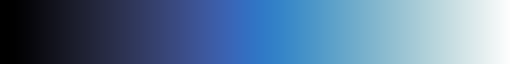

In [46]:
cmr.arctic

In [49]:
import matplotlib.pyplot as plt
import cmasher as cmr

def create_palette_from_cmap(cmap_name, num_colors):
    # Get the colormap
    cmap = getattr(cmr, cmap_name)

    # Extract colors from the colormap
    palette = cmap(np.linspace(0, 1, num_colors))

    return palette

# Example usage
palette = create_palette_from_cmap('arctic', 11)

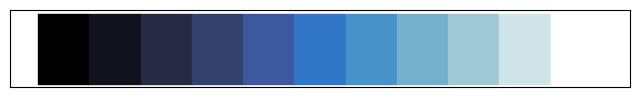

In [50]:
# Plot the palette
fig, ax = plt.subplots(figsize=(8, 1))
for i, color in enumerate(palette):
    ax.fill_between([i, i+1], 0, 1, color=color)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [51]:
gal_per_arcmin2=27
sigma_e=0.26
nbins=5
a=2
b=0.68
z0=0.11

In [52]:
z = np.linspace(0,3.5,256)
nz = jc.redshift.smail_nz(a, b, z0, gals_per_arcmin2=gal_per_arcmin2)
nz_bins = subdivide(nz, nbins=nbins, zphot_sigma=0.05)

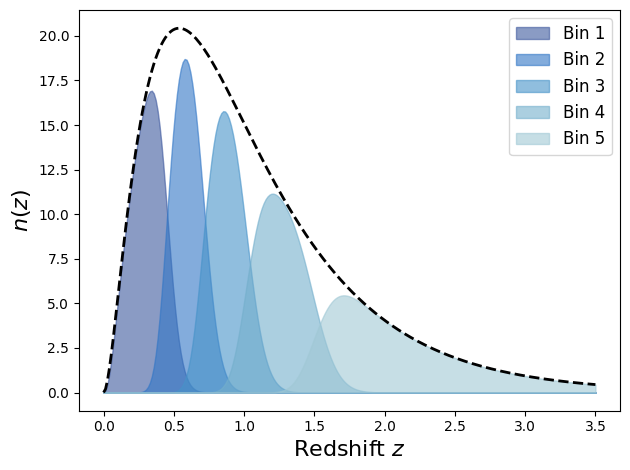

In [59]:
plot(z, nz(z)*nz.gals_per_arcmin2, '--', color='black', linewidth=2)

for i,b in enumerate(nz_bins):
    # plot(z, b(z)*b.gals_per_arcmin2, color=color_palette[i])
    fill_between(z, (b(z)*b.gals_per_arcmin2).min(), b(z)*b.gals_per_arcmin2, alpha=0.6, color=palette[i+4],label="Bin %d"%(i+1))

xlabel('Redshift $z$',fontsize=16)
ylabel('$n(z)$',fontsize=16)
legend(fontsize='large')
plt.tight_layout()
plt.savefig('redshift_distribution_light.pdf')